In [1]:
import os
os.getcwd()

'C:\\Users\\suhas\\Desktop\\ADS Python'

In [2]:
import bs4 #beautiful soup package

In [3]:
from urllib.request import urlopen as ureq
from bs4 import BeautifulSoup as Soup

In [5]:
import pandas as pd
tag_count = []

In [7]:
def suhash(suh):
    f = open("Python_Ques.txt", "a+", encoding = "utf-8")
    for c in suh:
        question_summary = c.a.text
        tags = []
        question_tags = c.findAll("div", {"class":"tags"})
        tagies = question_tags[0].findAll("a")
        tag_count.append(len(tagies))
        for i in range(0,len(tagies)):
            tags.append(tagies[i].text)
            f.write("__label__"+tags[i]+" ")
        f.write(question_summary+"\n")
    f.close()

In [8]:
def suhash11(i):
    my_url = "https://stackoverflow.com/questions/tagged/python?tab=newest&page="+str(i)+"&pagesize=50"
    uclient = ureq(my_url) # opens up the connection grabs the web page and stores in a variable
    page_html = uclient.read()
    uclient.close()
    page_soup = Soup(page_html, "html.parser")
    containers = page_soup.findAll("div", {"class":"question-summary"})
    suh = containers[0:50]
    suhash(suh)

In [ ]:
### ---------------------------
import time # i can do this way but  i will be doing step by step for every 200 pages
for i in range(1,1200):
    suhash11(i)
    if ((i%200)==0):
        time.sleep(60)  # for every 200 web pages takes a min break, if getting error for accesing increase the sleep to 5min
len(tag_count)
### ---------------------------

### Website does not allow to scrape the data so if we loop through each page at a fast rate it will block us from downloading 
### To avoid blocking i can use time.sleep for 60 sec after every 200 pages scraped
### so i will be looping through 200 pages at a time and look at no of records parsed and take a min break and run from where it is left and appending the result back 
### I can directly loop through 1200 pages as shown above but i will be doing as mentioned below to verify at each stage
### so, this way i can verify that there is nothing going wrong when downloading data

In [9]:
#Downloading 9,950 Questions
for i in range(1,200):
    suhash11(i)
len(tag_count)

9950

### skipped 200 page and some othe in future as i want to keep that as buffer because the page quite often gets updated with the questions as the python is intresting topic.
### so even the new data is added since i am skipping one page with 50 questions in it it would not affect so that all the questions will be unique. Which is good for analysis

In [10]:
# downloading 10k Questions
for i in range(201,401):
    suhash11(i)
len(tag_count)

19950

### Skipped 401 page

In [11]:
for i in range(402,602):
    suhash11(i)
len(tag_count)

29950

### Skipped 602 page

In [12]:
for i in range(603,804):
    suhash11(i)
len(tag_count)

40000

### Skipped 804 page

In [13]:
for i in range(805,1025):
    suhash11(i)
len(tag_count)

51000

In [14]:
Python_Ques = pd.DataFrame()
Python_Ques["count"] = pd.Series(tag_count)
print(Python_Ques)

       count
0          3
1          2
2          3
3          3
4          3
5          4
6          5
7          2
8          3
9          5
10         2
11         3
12         3
13         3
14         2
15         5
16         5
17         2
18         3
19         2
20         5
21         3
22         5
23         5
24         2
25         4
26         2
27         4
28         4
29         3
...      ...
50970      4
50971      5
50972      4
50973      4
50974      3
50975      3
50976      3
50977      3
50978      3
50979      2
50980      1
50981      3
50982      3
50983      3
50984      4
50985      3
50986      2
50987      3
50988      3
50989      2
50990      3
50991      5
50992      2
50993      3
50994      3
50995      1
50996      2
50997      3
50998      2
50999      4

[51000 rows x 1 columns]


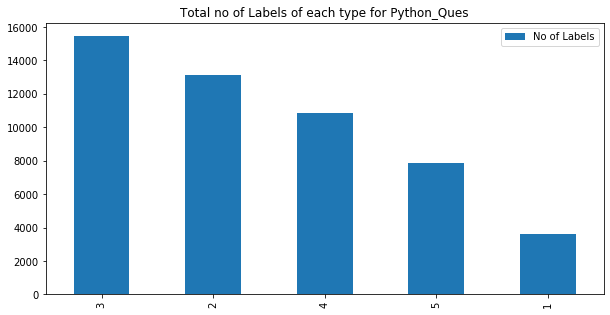

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
Python_Ques['count'].value_counts().plot(kind='bar', label = "No of Labels")
plt.title("Total no of Labels of each type for Python_Ques")
plt.legend()